<a href="https://colab.research.google.com/github/robson-rsp/datascience/blob/main/clustering/customer_personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contexto

## Agrupamento de clientes (clustering).

Este conjunto de dados corresponde a uma análise detalhadada dos clientes de uma empresa. Esta poderá modificar seus produtos de forma mais eficiente de acordo com o comportamento, necessidades e preocupações de diferentes tipos de consumidores. O objetivo é aumentar a receita enviando propagandas e oferecendo produtos que os clientes tenham mais chance de gostar de acordo com o seu perfil. Os atributos do conjunto de dados são:

**Clientes**
* **ID:** Identificador único.
* **Year_Birth:** Data de nascimento
* **Education:** Nível educacional
* **Marital_Status:** Estado civil
* **Income:** Renda familiar anual
* **Kidhome:** Número de crianças em casa
* **Teenhome:** Número de adolescentes em casa
* **Dt_Customer:** Data a qual o cliente criou uma conta no website da empresa
* **Recency:** Número de dias desde a última compra.
* **Complain:** 1 se o cliente fez alguma reclamação nos últimos dois anos, 0 caso contrário

**Produtos**
* **MntWines:** Valor gasto em vinho nos últimos 2 anos
* **MntFruits:** Valor gasto com frutas nos últimos 2 anos
* **MntMeatProducts:** Valor gasto com carne nos últimos 2 anos
* **MntFishProducts:** Valor gasto com peixe nos últimos 2 anos
* **MntSweetProducts:** Valor gasto com doces nos últimos 2 anos
* **MntGoldProds:** Valor gasto em ouro nos últimos 2 anos

**Promoções**
* **NumDealsPurchases:** Número de compras feitas com desconto
* **AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
* **AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
* **AcceptedCmp3:** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
* **AcceptedCmp4:** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
* **AcceptedCmp5:** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
* **Response:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

**Localizações**
* **NumWebPurchases:** Número de compras feitas através do website da empresa
* **NumCatalogPurchases:** Número de compras feitas usando o catálogo
* **NumStorePurchases:** Número de compras feitas diretamente nas lojas
* **NumWebVisitsMonth:** Número de acessos ao website da empresa no último mês

**Alvo**
* **Ausente:** Necessário utilizar algum algoritmo de segmentação para identificar agrupamentos de clientes com características em comum.


**Obs.** Não faço ideia do que significa 'MntGoldProds', mas fiz uma tradução literal para 'ouro', embora seja pouco provável que uma pessoa vá a um supermercado para comprar ouro.

**Fonte:** https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


#Imports iniciais

In [ ]:
%pip install kneed
%pip install feature-engine
%pip install ipython-autotime --upgrade
%pip install matplotlib --upgrade
%pip install scikit-learn --upgrade

In [1]:
from google.colab import drive, files
import pandas as pd
import warnings

%load_ext autotime

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Mounted at /content/drive
time: 34.2 s (started: 2023-03-06 12:17:26 +00:00)


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/clustering/customer_personality.csv', sep="\t", encoding='utf-8')

time: 534 ms (started: 2023-03-06 12:18:05 +00:00)


#EDA

In [ ]:
dataset.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##Data visualization

In [4]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

time: 1.06 s (started: 2023-03-06 12:18:16 +00:00)


Vou começar fazendo duas conversões básicas, mas úteis para a visualização de dados. Primeiro, vou renomear os atributos convertendo-os para letras minúsculas. Depois, vou converter 'Dt_Customer' que está em formato de string para pd.datetime.

In [5]:
columns_original = list(dataset.columns)
columns_lower = list(map(lambda x: x.lower(), columns_original))
columns_new = {key: value for (key, value) in zip(columns_original, columns_lower)}
dataset.rename(columns=columns_new, inplace=True)

time: 2.97 ms (started: 2023-03-06 12:18:36 +00:00)


In [6]:
ds = dataset['dt_customer'].copy()
ds = pd.to_datetime(ds, errors='coerce')
dataset['dt_customer'] = ds

time: 7.17 ms (started: 2023-03-06 12:18:39 +00:00)




---



###Visualização - Clientes

Os gráficos abaixo são representações visuais dos atributos que contém informações específicas dos clientes. Começando por dois gráficos que mostram a quantidade de pessoas separadas pelo nível educacional e a quantidade de pessoas por estado civil.

Além disso, as funções abaixo são dividias em dois blocos com 'if hue'. Fiz isso para poder usá-las antes e depois dos agrupamentos.

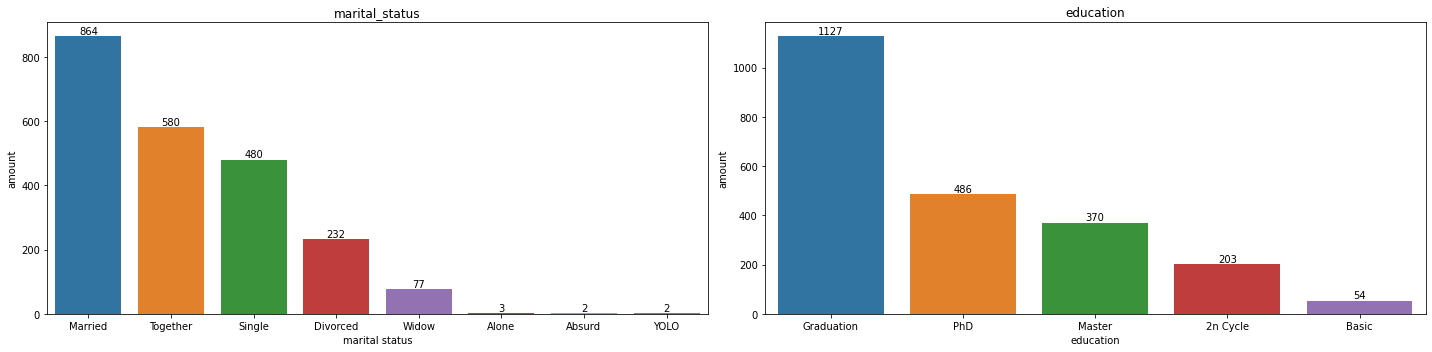

time: 813 ms (started: 2023-03-06 12:19:28 +00:00)


In [7]:
def marital_education(dataset, mstatus='marital_status', hue=False):
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  ax = ax.ravel()
  ax[1].set(xlabel='education', ylabel='amount')
  if hue:
    marital_status = dataset.groupby([mstatus, 'y'])[mstatus].value_counts()
    education      = dataset.groupby(['education', 'y'])['education'].value_counts()
    marital_classes, marital_y     = get_classes_hue(marital_status)
    education_classes, education_y = get_classes_hue(education)
    ax[0].set(xlabel='is single', ylabel='amount')
    x = sns.barplot(x=marital_classes, y=marital_status.values, hue=marital_y, ax=ax[0])
    y = sns.barplot(x=education_classes, y=education.values, hue=education_y, ax=ax[1])
    x.bar_label(x.containers[0])
    x.bar_label(x.containers[1])
    y.bar_label(y.containers[0])
    y.bar_label(y.containers[1])
  else:
    marital_status = dataset[mstatus].value_counts()
    education      = dataset['education'].value_counts()
    ax[0].set(xlabel='marital status', ylabel='amount')
    x = sns.barplot(x=marital_status.index, y=marital_status.values, ax=ax[0])
    y = sns.barplot(x=education.index, y=education.values, ax=ax[1])
    x.bar_label(x.containers[0])
    y.bar_label(y.containers[0])
  ax[0].set_title(marital_status.name)
  ax[1].set_title(education.name)
  plt.tight_layout()
  plt.show()



marital_education(dataset)

A seguir, vemos um gráfico de renda anual média por nível educacional.

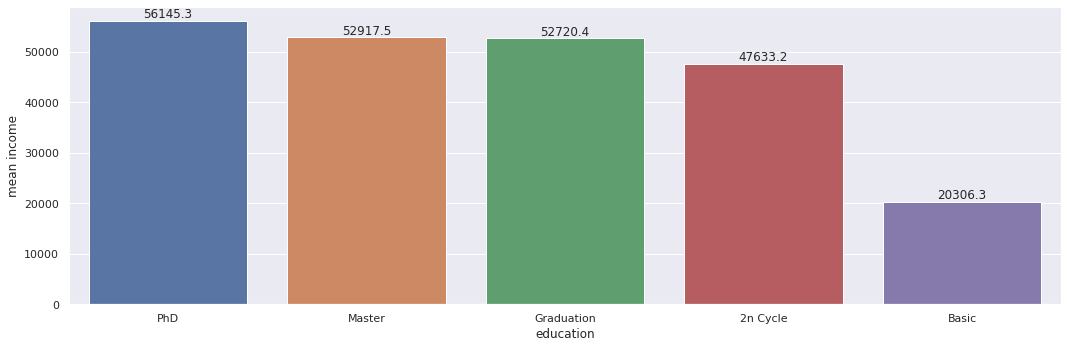

time: 404 ms (started: 2023-03-06 12:19:43 +00:00)


In [8]:
def income_vs_education(dataset, hue=False):
  sns.set(rc={'figure.figsize':(15, 5)})
  if hue:
    income_education = dataset.groupby(['education', 'y'])['income'].mean()
    classes, y = get_classes_hue(income_education)
    x = sns.barplot(x=classes, y=income_education.values, hue=y)
    x.bar_label(x.containers[0])
    x.bar_label(x.containers[1])
  else:
    income_education = dataset.groupby('education')['income'].mean()
    income_education = income_education.sort_values(ascending=False)
    x = sns.barplot(x=income_education.index, y=income_education.values)
    x.bar_label(x.containers[0])
  x.set(xlabel='education', ylabel='mean ' + income_education.name)
  plt.tight_layout()
  plt.show()



income_vs_education(dataset)

Vou juntar os atributos 'kidhome'	e 'teenhome' em um só chamado 'childrenhome' que será a soma dos dois. Depois, vou olhar a renda média das pessoas que têm filhos e as que não têm.

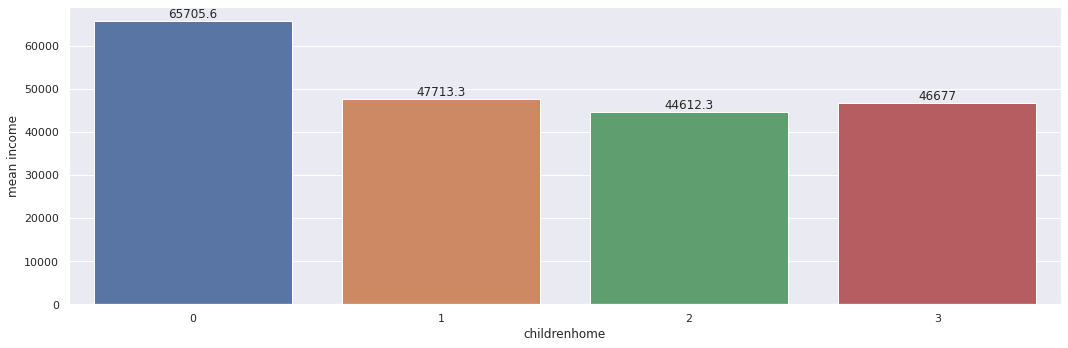

time: 297 ms (started: 2023-03-06 12:19:57 +00:00)


In [9]:
def childrenhome_vs_income(dataset, hue=False):
  ds = dataset.copy()
  try:
    ds['childrenhome'] = dataset['kidhome'] + dataset['teenhome']
  except KeyError:
    pass # não faz nada, pois já existe 'childrenhome'
  sns.set(rc={'figure.figsize':(15, 5)}) 
  if hue:
    income_children = ds.groupby(['childrenhome', 'y'])['income'].mean()
    classes, y = get_classes_hue(income_children)
    x = sns.barplot(x=classes, y=income_children.values, hue=y)
    x.bar_label(x.containers[0])
    x.bar_label(x.containers[1])
  else:
    income_children  = ds.groupby('childrenhome')['income'].mean()
    income_children  = income_children.sort_values(ascending=False)
    x = sns.barplot(x=income_children.index, y=income_children.values)
    x.bar_label(x.containers[0])
  x.set(xlabel='childrenhome', ylabel='mean income')
  plt.tight_layout()
  plt.show()



childrenhome_vs_income(dataset)

**Conclusão:** Estas visualizações servem para confirmarmos algumas intuições sobre a renda média anual dos clientes, como:

*   Quanto maior o nível educacional, maior a renda
*   Clientes que não têm nenhuma criança ou jovem em casa têm uma renda média maior, mas entre os que têm de 1 até 3 filhos a renda é semelhante.



### Visualização - Produtos

Vou ser mais específico agora. Quero ver qual o gasto médio de pessoas com 0 até 3 filhos com cada categoria de produto.

In [10]:
def get_series(dataset):
  length = dataset.shape[0]
  values = list()
  for i in range(0, length, 2):
    cl_0 = dataset.iloc[i]
    cl_1 = dataset.iloc[i + 1]
    values.append(list(itertools.chain(*zip(cl_0, cl_1)))) # concatena as duas listas, mas intercalando seus valores
  clusters  = [0, 1] * len(dataset.columns)
  names     = (list(np.repeat(list(dataset.columns), 2))) # duplica todos os nomes de atributos
  tuples    = [(name, y) for name, y in zip(names, clusters)]
  multindex = pd.MultiIndex.from_tuples(tuples, names=['childrenhome', 'y'])
  childrenhome = list()
  for group in values:
    childrenhome.append(pd.Series(data=group, index=multindex))
  return childrenhome

time: 2.38 ms (started: 2023-03-06 12:20:34 +00:00)


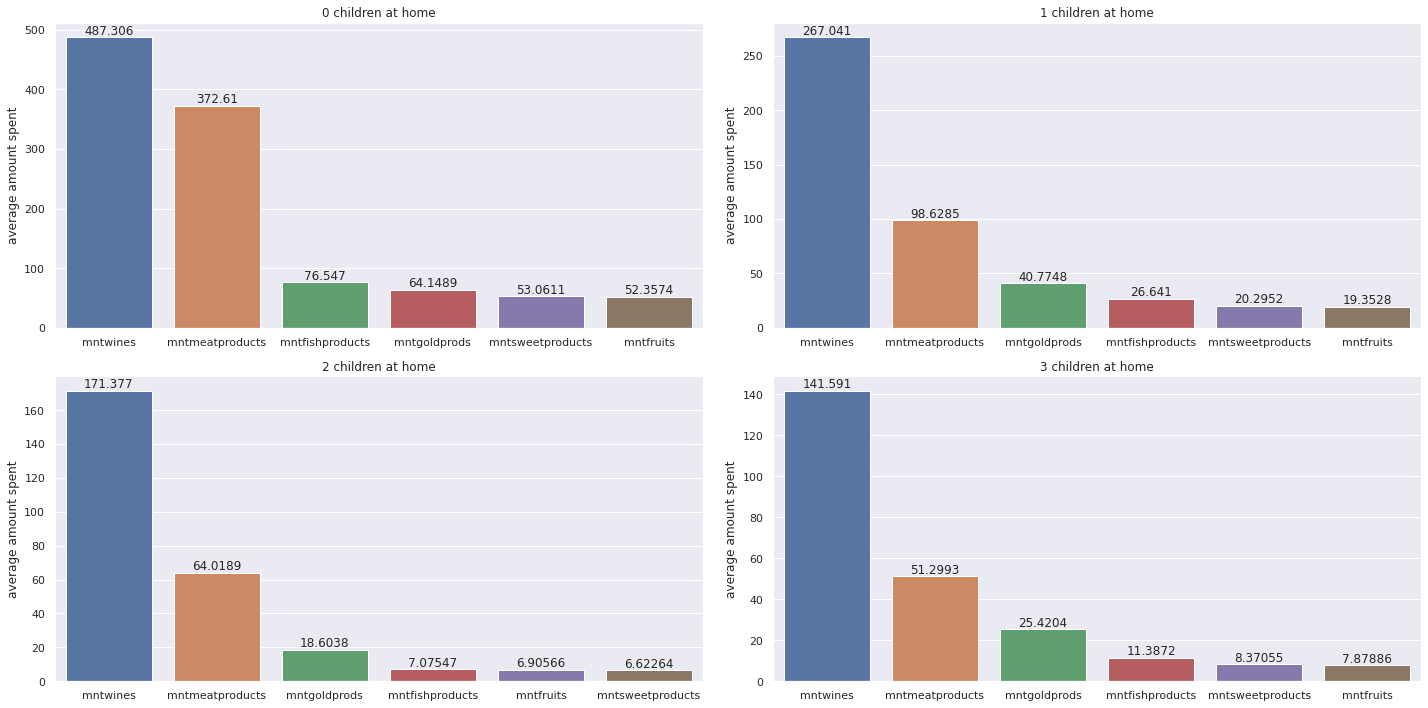

time: 1.92 s (started: 2023-03-06 12:20:43 +00:00)


In [11]:
def mntproducts_vs_children(dataset, hue=False):
  ds = dataset.copy()
  cols = ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']
  try:
    ds['childrenhome'] = dataset['kidhome'] + dataset['teenhome']
  except KeyError:
    pass # não faz nada, pois já existe 'childrenhome'
  fig, ax = plt.subplots(2, 2, figsize=(20, 10))
  ax = ax.ravel()
  if hue:
    children_mnt_products = ds.groupby(['childrenhome', 'y'])[cols].mean()
    series = get_series(children_mnt_products)
    for index, (s, ax) in enumerate(zip(series, ax)):
      children, y = get_classes_hue(s)
      x = sns.barplot(x=children, y=s.values, hue=y, ax=ax)
      x.bar_label(x.containers[0])
      x.bar_label(x.containers[1])
      x.set_title(str(index) + ' children at home')
      x.set(ylabel='average amount spent')
  else:
    children_mnt_products = ds.groupby('childrenhome')[cols].mean()
    children_mnt_products = children_mnt_products.sort_values(cols, ascending=False)
    for index, ax in enumerate(ax):
      series = pd.Series(data=children_mnt_products.iloc[index, :], index=children_mnt_products.columns)
      series = series.sort_values(ascending=False)
      x = sns.barplot(x=series.index, y=series.values, ax=ax)
      x.bar_label(x.containers[0])
      x.set_title(str(index) + ' children at home')
      x.set(ylabel='average amount spent')
  plt.tight_layout()
  plt.show()



mntproducts_vs_children(dataset)


Estou surpreso com a quantidade de dinheiro gasto em vinhos! Achava que pessoas com uma ou mais crianças em casa tenderiam a gastar mais com doces do que as que não têm, mas aparentemente estava errado.

Outra coisa interessante para se visualizar é um gráfico (x, y) onde x=renda e y=(soma das compras dos produtos de cada categoria nos últimos dois anos). Esse gráfico pode ajudar a imputar valores para 'income' se houver uma relação linear.

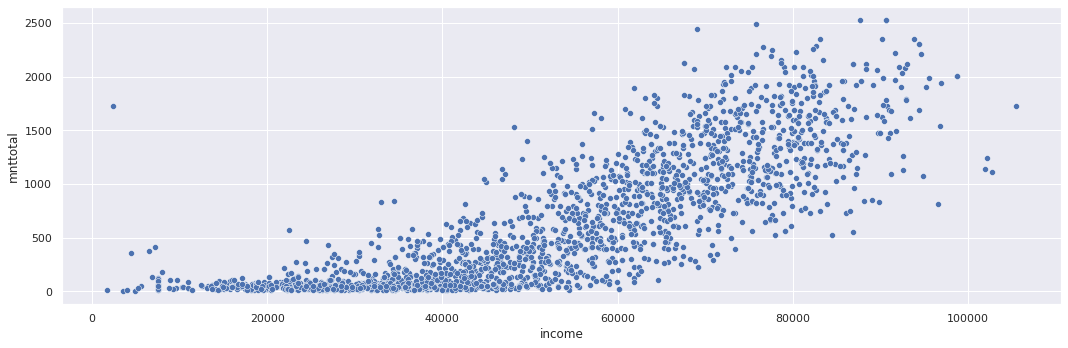

time: 413 ms (started: 2023-03-06 12:21:30 +00:00)


In [12]:
def mnttotal_vs_income(dataset, hue=False):
  cols = ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']
  mnttotal = dataset[cols].sum(axis=1)
  mnttotal.name = 'mnttotal'
  if hue:
    ds      = pd.concat([dataset[['income', 'y']], mnttotal], axis=1)
    mask    = ds['income'] < 110_000
    ds      = ds[mask]
    ds      = ds.dropna()
    ds['y'] = ds['y'].map({0:'Cluster 0', 1:'Cluster 1'})
    sns.scatterplot(data=ds, x='income', y='mnttotal', hue=ds['y'], palette={'Cluster 0':'blue', 'Cluster 1':'red'})
  else:
    ds = pd.concat([dataset['income'], mnttotal], axis=1)
    mask = ds['income'] < 110_000
    ds = ds[mask]
    sns.scatterplot(data=ds, x='income', y='mnttotal')
  sns.set(rc={'figure.figsize':(15, 10)})
  plt.tight_layout()
  plt.show()



mnttotal_vs_income(dataset)

Abaixo, vemos a média de vendas das categorias de protudos conforme a idade dos clientes avança. Como são seis categorias de produtos vou fazer dois gráficos com três categorias cada para facilitar a visualização.

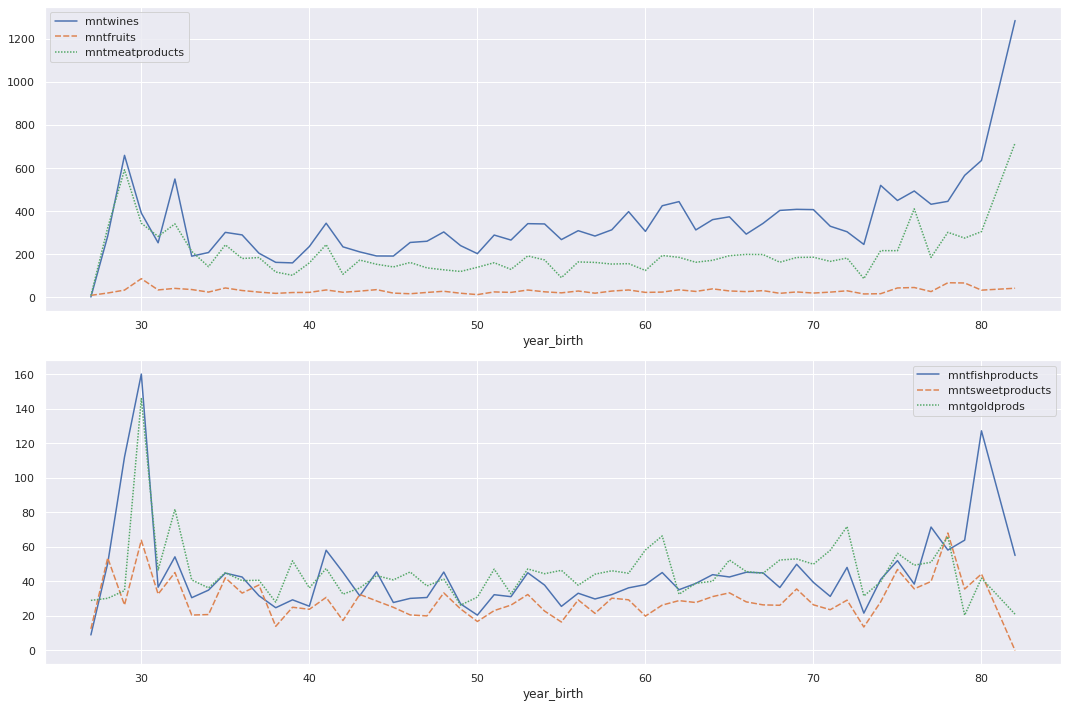

time: 910 ms (started: 2023-03-06 12:21:51 +00:00)


In [13]:
def mntproducts_vs_age(dataset):
  cols = ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']
  ages = dataset.groupby('year_birth')[cols].mean()
  mask = ages.index > 1940
  ages = ages[mask]
  ages.index = 2023 - ages.index # converte o ano de nascimento para a idade do cliente
  ages_a = ages.iloc[:, :3]
  ages_b = ages.iloc[:, 3:]
  fig, axis = plt.subplots(2, 1, figsize=(15, 10))
  axis = axis.ravel()
  sns.lineplot(data=ages_a, ax=axis[0])
  sns.lineplot(data=ages_b, ax=axis[1])
  plt.tight_layout()
  plt.show()



mntproducts_vs_age(dataset)

**Conclusão:**

*   **Vinhos:** Há um pico de vendas para clientes de [25, 35] anos de idade, dos [60, 65] e por último pessoas acima dos 75 anos.
*   **Frutas:** Há picos de vendas  para clientes com 30 anos e depois um leve aumento para pessoas acima dos 70.
*   **Carnes:** As pessoas que mais compram carne são as que estão entre [25, 30] anos e as que tem mais de 75.
*   **Peixes:** Os picos de vendas são com clientes de mais ou menos 30 e 80 anos.
*   **Doces:** Os maiores consumidores estão no intervalo de [20,35] e [75, 80].
*   **Ouro:** Mais uma vez os campeões em compras estão no intervalo [30, 35], [60, 65] e [70, 75].

O que me chama a atenção é que os principais clientes dessa empresa são pessoas jovens, por volta dos 30 anos e pessoas que passaram da terceira idade. As outras faixas etárias ficam estáveis.

Outra questão importante é que há uma relação linear entre a renda anual de um cliente e total de compras feitas nos últimos dois anos. Isso significa que a imputação de renda nos campos NaN pode ser feita apartir do total de compras. É uma maneira mais inteligente do que escolher a média ou mediana.

###Visualização - Promoções

Gráfico de torta mostrando a proporção de clientes que aceitou uma oferta em alguma campanha de marketing e aqueles que nunca aceitaram. Como os atributos são booleanos onde 0 = 'rejeitou' e 1 = 'aceitou', basta somar as linhas de cada coluna para saber quantos clientes aceitaram as ofertas em cada atributo. 

<Figure size 504x504 with 0 Axes>

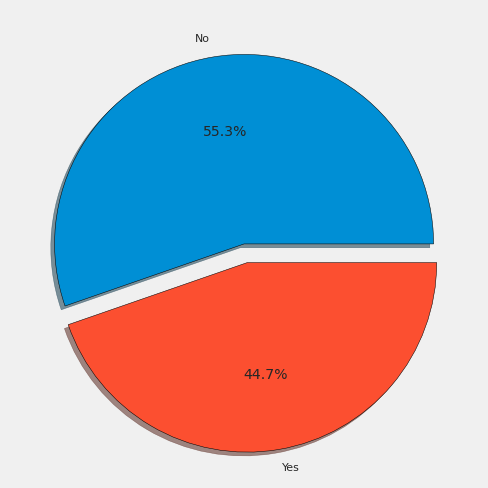

time: 177 ms (started: 2023-03-06 12:23:07 +00:00)


In [14]:
def accepted_offers_rate(dataset, clusters=False):
  cols = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response']
  plt.figure(figsize=(7, 7))
  plt.style.use("fivethirtyeight")
  if clusters:
    mask = dataset['y'] == 0
    cluster_0 = dataset[mask]
    yes_rate  = (cluster_0[cols].sum().sum() / cluster_0.shape[0]) * 100
    no_rate   = 100 - yes_rate
    cluster_0_no_yes = pd.Series(data=[no_rate, yes_rate], index=['No', 'Yes'])
    mask = dataset['y'] == 1
    cluster_1 = dataset[mask]
    yes_rate  = (cluster_1[cols].sum().sum() / cluster_1.shape[0]) * 100
    no_rate   = 100 - yes_rate
    cluster_1_no_yes = pd.Series(data=[no_rate, yes_rate], index=['No', 'Yes'])
    fig, ax = plt.subplots()
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap([0, 2])
    inner_colors = cmap([6, 4])
    slices = cluster_0_no_yes.to_numpy().ravel()
    labels = cluster_0_no_yes.index.to_list()
    ax.pie(slices, labels=labels, radius=1, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', colors=outer_colors)
    slices = cluster_1_no_yes.to_numpy().ravel()
    labels = cluster_1_no_yes.index.to_list()
    ax.pie(slices, radius=0.5, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', colors=inner_colors)
  else:
    accept_offer_rate = (dataset[cols].sum().sum() / dataset.shape[0]) * 100
    reject_offer_rate = 100 - accept_offer_rate
    no_yes = pd.Series(data=[reject_offer_rate, accept_offer_rate], index=['No', 'Yes'])
    no_yes = no_yes.sort_values(ascending=False)
    slices = no_yes.to_numpy().ravel()
    labels = no_yes.index.to_list()
    explode = [0, 0.1]
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(7, 7))
    plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, autopct='%1.1f%%', shadow=True)
  plt.tight_layout()
  plt.show()



accepted_offers_rate(dataset)

Histograma mostrando a porcentagem de clientes que aceitaram as ofertas da primeira até a última companha.

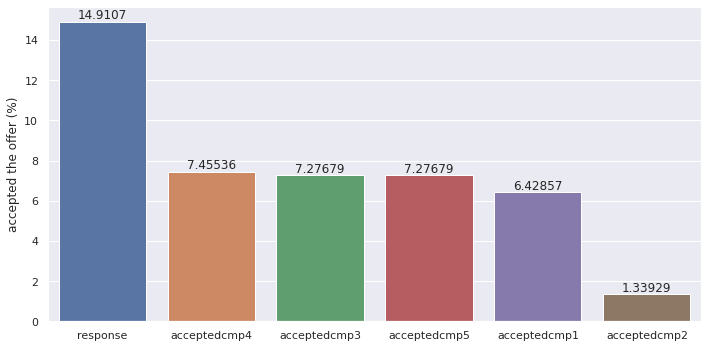

time: 352 ms (started: 2023-03-06 12:23:31 +00:00)


In [15]:
def accepted_offers(dataset, hue=False):
  cols = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response']
  sns.set(rc={'figure.figsize':(10, 5)})
  if hue:
    accepted = (dataset_.groupby('y')[cols].sum() / dataset_.shape[0]) * 100
    accepted = pd.concat([accepted.T[0.0], accepted.T[1.0]], axis=0)
    accepted = pd.DataFrame(data=accepted, columns=['accepted'])
    clusters = ['Cluster 0', 'Cluster 0', 'Cluster 0', 'Cluster 0', 'Cluster 0', 'Cluster 0', 
                'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1', 'Cluster 1']
    accepted['y'] = clusters
    x = sns.barplot(data=accepted, x=list(accepted.index), y='accepted', hue='y')
    x.bar_label(x.containers[0])
    x.bar_label(x.containers[1])
  else:
    accepted = (dataset[cols].sum() / dataset.shape[0]) * 100
    accepted = accepted.sort_values(ascending=False)
    x = sns.barplot(x=accepted.index, y=accepted.values)
    x.bar_label(x.containers[0])
  x.set(ylabel='accepted the offer (%)')
  plt.tight_layout()
  plt.show()



accepted_offers(dataset)

**Conclusão:** Com os últimos gráficos podemos ver que as pessoas têm uma leve tendência a não aceitar as ofertas feitas pelas campanhas de marketing. E das que aceitam, a maior parte delas só aceita na última campanha.

###Visualização - Localizações

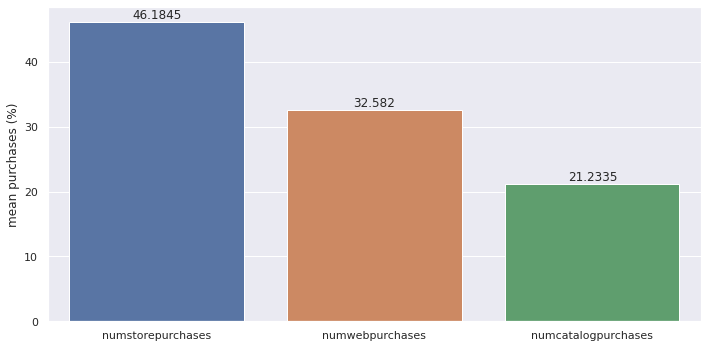

time: 261 ms (started: 2023-03-06 12:24:16 +00:00)


In [16]:
def purchases_location(dataset, hue=False):
  cols = ['numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']
  if hue:
    amount_purchases   = dataset.groupby('y')[cols].sum()
    total_purchases_c0 = amount_purchases.loc[0].sum()
    total_purchases_c1 = amount_purchases.loc[1].sum()
    x = (amount_purchases.T[0.0] / total_purchases_c0) * 100
    y = (amount_purchases.T[1.0] / total_purchases_c1) * 100
    purchases_rate = pd.concat([x, y], axis=0)
    purchases_rate = pd.DataFrame(data=purchases_rate, columns=['purchases_rate'])
    clusters = ['Cluster 0', 'Cluster 0', 'Cluster 0', 'Cluster 1', 'Cluster 1', 'Cluster 1']
    purchases_rate['y'] = clusters
    x = sns.barplot(data=purchases_rate, x=list(purchases_rate.index), y='purchases_rate', hue='y')
    x.bar_label(x.containers[0])
    x.bar_label(x.containers[1])
  else:
    amount_purchases  = dataset[cols].sum()
    percent_purchases = (amount_purchases / amount_purchases.sum()) * 100
    percent_purchases = percent_purchases.sort_values(ascending=False)
    x = sns.barplot(x=percent_purchases.index, y=percent_purchases.values)
    x.bar_label(x.containers[0])
    x.set(ylabel='mean purchases (%)')
  plt.tight_layout()
  plt.show()



purchases_location(dataset)

**Conclusão:** O gráfico acima nos diz que a maior parte das vendas são feitas em lojas físicas. Em segundo lugar ficam as vendas pela internet. Por último, o catálogo da empresa é o preferido pelos clientes para fazerem suas compras.

#Train/Test split

Como o conjunto de dados não possui rótulo não há motivos para se fazer esse tipo de separação.

#Feature engineering

In [17]:
from datetime                import date, datetime
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.base            import BaseEstimator, TransformerMixin
from sklearn.compose         import ColumnTransformer
from sklearn.experimental    import enable_iterative_imputer
from sklearn.impute          import IterativeImputer, KNNImputer
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import OrdinalEncoder

time: 630 ms (started: 2023-03-06 12:27:31 +00:00)


In [33]:
feat_names_categorical = ['education', 'marital_status', 'complain', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response']
feat_names_numerical   = ['year_birth', 'income', 'kidhome', 'teenhome', 'dt_customer', 'recency',	'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']
feat_names_binary      = ['complain', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'response']
feat_names_nominal     = ['marital_status']
feat_names_ordinal     = ['education']
feat_names_updated     = list(dataset.columns)

time: 4.24 ms (started: 2023-03-06 12:43:41 +00:00)


A classe ColumnTransformer retorna por padrão um numpy array, mas para gerenciar melhor os atributos que passarão por transformações através de um pipeline, prefiro que ela retorne sempre um objeto DataFrame do Pandas. O problema é que este vem com os nomes das colunas alterados, então resolvi criar a classe abaixo para atribuir ao DataFrame que saiu do ColumnTransformer os nomes originais.

In [34]:
class FeaturesRenamer(BaseEstimator, TransformerMixin):
    """
    Esta classe deve ser colocada diretamente dentro de um Pipeline.
    Quando 'get_feature_names_out()' é chamado ele concatena o nome do transformador ao nome de cada coluna
    que passará pela transformação. Esta classe desfaz isso retornando os nomes originais.
    """
    def __init__(self, original_names):
        if isinstance(original_names, list):
            self.original_names = original_names
        else:
            self.original_names = list(original_names)
    def fit(self, X, y=None):
        return self
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)
    def transform(self, X, y=None):
        new_names = list()
        for name in list(X.columns):
            for original in self.original_names:
                if name.endswith('__' + original):
                    new_names.append(original)
        return X.set_axis(new_names, axis=1)

time: 6.38 ms (started: 2023-03-06 12:43:46 +00:00)


##Categorical features

**Etapa ##: Atributos: Combinação:** 
1.   'marital_status' possui várias classes que significam a mesma coisa. Vou renomeá-las para diminuir essa redundância. Na verdade, vou criar um atributo booleano 'single' que dirá se a pessoa é solteria ou não e remover 'marital_status'.
2.   Vou criar um atributo chamado 'childrenhome' que será resultado da soma de 'kidhome' e 'teenhome' e remover esses dois algumas etapas mais a frente no pipeline. O novo atributo dirá quantas crianças há na casa do cliente sem entrar em detalhes se são muito pequenas ou adolescentes.

In [35]:
class FeatTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def fit_transform(self, X, y=None):
    self.fit(X, y)
    return self.transform(X, y)
  def renamer(self, name):
    single = ['Single', 'Divorced', 'Alone' 'Absurd' 'YOLO']
    return name in single
  def transform(self, X, y=None):
    X['single'] = np.vectorize(self.renamer)(X['marital_status'])
    X['childrenhome'] = X['kidhome'] + X['teenhome']
    return X
  def get_feature_names_out(self):
    pass



ct_ftrans = ColumnTransformer(transformers=[('features_transformer', FeatTransformer(), ['marital_status', 'kidhome', 'teenhome'])], remainder='passthrough')
ct_ftrans.set_output(transform='pandas')

feat_names_updated.extend(['single', 'childrenhome'])

time: 5.48 ms (started: 2023-03-06 12:43:52 +00:00)


**Etapa ##: Atributos binários: Codificação:** Aqueles encontrados no conjunto de dados já estão codificados.

**Etapa ##: Atributos nominais: Codificação:** Para essa tarefa usarei a classe CountFrequencyEncoder. Essa classe usará os valores da função value_counts() no lugar do seu nome correspondente. Esse método só é recomendado caso todas as classes encontradas no atributo possuam frequências diferentes. Não é o caso aqui; a classe 'Absurd' e 'YOLO' tem a mesma frequência, mas é tão baixa que posso ignorá-las e deixar a classe tratá-las do seu jeito.

In [36]:
ct_nominal = ColumnTransformer(transformers=[('nominal_encoder', CountFrequencyEncoder(), feat_names_nominal)], remainder='passthrough')
ct_nominal.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('nominal_encoder', CountFrequencyEncoder(),
                                 ['marital_status'])])

time: 8.18 ms (started: 2023-03-06 12:43:59 +00:00)


**Etapa ##: Atributos ordinais: Codificação:**

In [37]:
ct_ordinal = ColumnTransformer(transformers=[('ordinal_encoder', OrdinalEncoder(), feat_names_ordinal)], remainder='passthrough')
ct_ordinal.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_encoder', OrdinalEncoder(),
                                 ['education'])])

time: 11.3 ms (started: 2023-03-06 12:44:06 +00:00)


**Etapa ##: Datas: Converter:** Vou converter a coluna 'dt_customer', que contém a data da inscrição do cliente no website da empresa, para os dias que se passaram do dia de hoje até a inscrição. Vai ficar um número inteiro, mas representa a mesma informação.

In [38]:
class DaysElapsed(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.day_today = datetime.now()
    return self
  def fit_transform(self, X, y=None):
    self.fit(X, y)
    return self.transform(X, y)
  def transform(self, X, y=None):
    X = self.day_today - X
    X = X.iloc[:, 0] # transforma que é um DataFrame em uma Serie
    X = X.dt.days
    return pd.DataFrame(data=X.values, columns=[X.name])
  def get_feature_names_out(self):
    pass



ct_days = ColumnTransformer(transformers=[('days_elaped', DaysElapsed(), ['dt_customer'])], remainder='passthrough')
ct_days.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('days_elaped', DaysElapsed(),
                                 ['dt_customer'])])

time: 25.7 ms (started: 2023-03-06 12:44:13 +00:00)


**Etapa final:**

In [39]:
pipeline_cat = Pipeline(steps=[('ct_ftrans',  ct_ftrans),
                               ('renamer01',  FeaturesRenamer(feat_names_updated)),
                               ('ct_nominal', ct_nominal),
                               ('renamer02',  FeaturesRenamer(feat_names_updated)),
                               ('ct_ordinal', ct_ordinal),
                               ('renamer03',  FeaturesRenamer(feat_names_updated)),
                               ('ct_days',    ct_days),
                               ('renamer04',  FeaturesRenamer(feat_names_updated)),])


# este pipeline será usado após a criação dos agrupamentos 
# ele não possui as codificações de variáveis categóricas para numéricas para facilitar a visualização e entendimento dos gráficos
pipeline_cat_ = Pipeline(steps=[('ct_ftrans',  ct_ftrans),
                               ('renamer01',  FeaturesRenamer(feat_names_updated)),
                               ('ct_days',    ct_days),
                               ('renamer04',  FeaturesRenamer(feat_names_updated)),])

time: 2.07 ms (started: 2023-03-06 12:44:24 +00:00)


##Numerical features

In [40]:
dataset[feat_names_numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_birth           2240 non-null   int64         
 1   income               2216 non-null   float64       
 2   kidhome              2240 non-null   int64         
 3   teenhome             2240 non-null   int64         
 4   dt_customer          2240 non-null   datetime64[ns]
 5   recency              2240 non-null   int64         
 6   mntwines             2240 non-null   int64         
 7   mntfruits            2240 non-null   int64         
 8   mntmeatproducts      2240 non-null   int64         
 9   mntfishproducts      2240 non-null   int64         
 10  mntsweetproducts     2240 non-null   int64         
 11  mntgoldprods         2240 non-null   int64         
 12  numdealspurchases    2240 non-null   int64         
 13  numwebpurchases      2240 non-nul

**Etapa ##: NaN : Imputar:** Vou adicionar o atributo 'mnttotal' ao conjuntos de dados para poder fazer uma regressão linear para imputar valores nulos de 'income'. Este novo atributo é resultado da soma de todas as compras feitas por um cliente nos últimos dois anos.

In [41]:
class MntTotal(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def fit_transform(self, X, y=None):
    self.fit(X, y)
    return self.transform(X, y)
  def transform(self, X, y=None):
    X['mnttotal'] = X[['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].sum(axis=1)
    return X
  def get_feature_names_out(self):
    pass



ct_mnttotal = ColumnTransformer(transformers=[('mnttotal', MntTotal(), ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods'])], remainder='passthrough')
ct_mnttotal.set_output(transform='pandas')

feat_names_updated.extend(['mnttotal'])

time: 3.98 ms (started: 2023-03-06 12:44:36 +00:00)


Agora, posso fazer a imputação.

In [43]:
ct_nan = ColumnTransformer(transformers=[('iterative_imputer', IterativeImputer(), ['mnttotal', 'income'])], remainder='passthrough')
ct_nan.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('iterative_imputer', IterativeImputer(),
                                 ['mnttotal', 'income'])])

time: 15.6 ms (started: 2023-03-06 12:44:57 +00:00)


**Etapa ##: Outliers :** Identificação e substituição pela mediana.

In [44]:
class OutliersZScoreReplacer(BaseEstimator, TransformerMixin):
    """
    Substitui os outliers encontrados pelas medianas de cada atributo.
    """
    def fit(self, X, y=None):
        self.mean_std_median = list()
        for name in X.columns:
         
            mean   = X[name].mean()
            std    = X[name].std()
            median = X[name].median()
            self.mean_std_median.append((mean, std, median))
        return self
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)
    def transform(self, X, y=None):
        std_unit = 3
        for index, name in enumerate(X.columns):
            mean    = self.mean_std_median[index][0]
            std     = self.mean_std_median[index][1]
            median  = self.mean_std_median[index][2]
            scores  = ((X[name] - mean) / std)
            filter_mask = ((scores < -std_unit) | (scores > std_unit))
            X.loc[filter_mask, name] = median
        return X
    def get_feature_names_out(self):
        pass



ct_outliers = ColumnTransformer(transformers=[('outliers_replacer', OutliersZScoreReplacer(), feat_names_numerical)], remainder='passthrough')
ct_outliers.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('outliers_replacer', OutliersZScoreReplacer(),
                                 ['year_birth', 'income', 'kidhome', 'teenhome',
                                  'dt_customer', 'recency', 'mntwines',
                                  'mntfruits', 'mntmeatproducts',
                                  'mntfishproducts', 'mntsweetproducts',
                                  'mntgoldprods', 'numdealspurchases',
                                  'numwebpurchases', 'numcatalogpurchases',
                                  'numstorepurchases', 'numwebvisitsmonth'])])

time: 27.5 ms (started: 2023-03-06 12:45:30 +00:00)


**Etapa final:**

In [45]:
pipeline_num = Pipeline(steps=[('ct_mnttotal', ct_mnttotal),
                               ('renamer01',   FeaturesRenamer(feat_names_updated)),
                               ('ct_nan',      ct_nan),
                               ('renamer02',   FeaturesRenamer(feat_names_updated)),
                               ('ct_outliers', ct_outliers),
                               ('renamer03',   FeaturesRenamer(feat_names_updated)),])

time: 2.75 ms (started: 2023-03-06 12:45:36 +00:00)


##Full pipeline

**Etapa ##: Atributos indesejados:** Remover. Coloquei essa classe diretamente em um pipeline porque é uma tarefa que não é específica de um tipo de variável apenas. Ela envolve variáveis categóricas e numéricas.

In [46]:
class FeaturesRemover(BaseEstimator, TransformerMixin):
  """
  Remove atributos de um DataFrame.
  Essa classe deve ser usada diretamente em um Pipeline que deve passar para ela um DataFrame.
  Os atributos que serão removidos devem ser passados em uma lista por argumento.
  """
  def __init__(self, cols=None):
    self.cols = cols
  def fit(self, X, y=None):
    return self
  def fit_transform(self, X, y=None):
    self.fit(X, y)
    return self.transform(X, y)
  def transform(self, X, y=None):
    if self.cols:
      print(f'Cols to drop: {self.cols}')
      return X.drop(self.cols, axis=1)
    else:
      return X

time: 4.35 ms (started: 2023-03-06 12:46:01 +00:00)


In [47]:
cols_drop = ['id', 'z_costcontact', 'z_revenue', 'mnttotal', 'kidhome', 'teenhome', 'marital_status']

pipeline_full = Pipeline(steps=[('pipeline_cat', pipeline_cat),
                                ('pipeline_num', pipeline_num),
                                ('feat_remover', FeaturesRemover(cols_drop)),])

# este pipeline será usado após a criação dos agrupamentos. ele possui aquela versão diferenciada de 'pipeline_cat'
pipeline_full_ = Pipeline(steps=[('pipeline_cat_', pipeline_cat_),
                                 ('pipeline_num',   pipeline_num),
                                 ('feat_remover',   FeaturesRemover(cols_drop)),])

X  = pipeline_full.fit_transform(dataset)
X_ = pipeline_full_.fit_transform(dataset)

Cols to drop: ['id', 'z_costcontact', 'z_revenue', 'mnttotal', 'kidhome', 'teenhome', 'marital_status']
Cols to drop: ['id', 'z_costcontact', 'z_revenue', 'mnttotal', 'kidhome', 'teenhome', 'marital_status']
time: 264 ms (started: 2023-03-06 12:47:33 +00:00)


#Model

In [48]:
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch

time: 235 ms (started: 2023-03-06 12:47:41 +00:00)


Como a tarefa é de agrupamento escolhi três modelos candidatos e uma métrica.

Modelos:

1.   KMeans
2.   DBScan
3.   AgglomerativeClustering: Classe que implementa Hierarchical cluster.

Métrica:

1.   silhouette_score: Mais famosa em aprendizado não supervisionado para agrupamento.O resultado da função pertence ao intervalo [-1, 1].
    *   Pontuações próximas de -1: modelo errou bastante ou completamente os agrupamentos.
    *   Pontuações próximas de  0: os agrupamentos encontrados estão sobrepostos em um certo grau.
    *   Pontuações próximas de  1: o modelo encontrou agrupamentos bastante afastados uns dos outros e muito bem definidos.




##KMeans

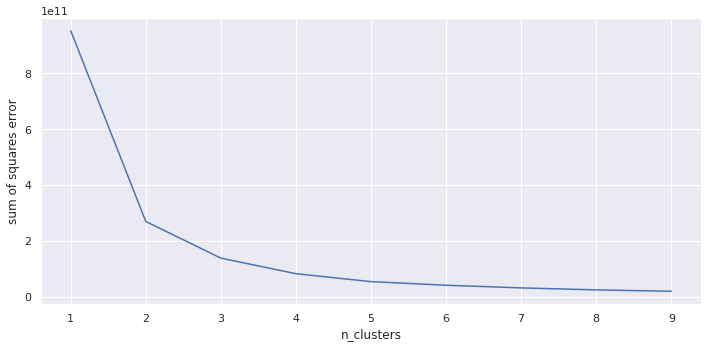

time: 5.54 s (started: 2023-03-06 12:47:55 +00:00)


In [49]:
clusters = 10
k_range = range(1, clusters)
sse = list()
for k in k_range:
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X)
  sse.append(kmeans.inertia_) # esse atributo de kmeans contém a soma dos erros ao quadrado(sum of squares error)
x = sns.lineplot(x=k_range, y=sse)
x.set(xlabel='n_clusters', ylabel='sum of squares error')
sns.set(rc={'figure.figsize':(10, 5)})
plt.tight_layout()
plt.show()

In [50]:
kl = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
clusters = kl.elbow
print(f'O número de clusters escolhido para o algoritmo KMeans é {clusters}')

O número de clusters escolhido para o algoritmo KMeans é 3
time: 3.51 ms (started: 2023-03-06 12:48:07 +00:00)


In [51]:
clusters = 2
kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)
score = silhouette_score(X, y_pred)
print(f'Com {clusters} clusters a pontuação média foi {score}')

# calcula a silhouette_score para cada ponto
#silhouette_sample_avg = silhouette_samples(X, y_pred)

Com 2 clusters a pontuação média foi 0.6078575392143746
time: 213 ms (started: 2023-03-06 12:48:16 +00:00)


Com 3 agrupamentos a pontuação do modelo foi 0.5483, mas eu resolvi testá-lo com 2, e a sua pontuação foi 0.6078.

##DBScan

In [54]:
dbs = DBSCAN(eps=0.001, min_samples=3)
y_pred = dbs.fit_predict(X)
clusters = len(np.unique(y_pred))
score = silhouette_score(X, y_pred)
print(f'Com {clusters} clusters a pontuação média foi {score}')

Com 7 clusters a pontuação média foi -0.7551571165882551
time: 214 ms (started: 2023-03-06 12:48:48 +00:00)


##AgglomerativeClustering - Hierarchical clustering

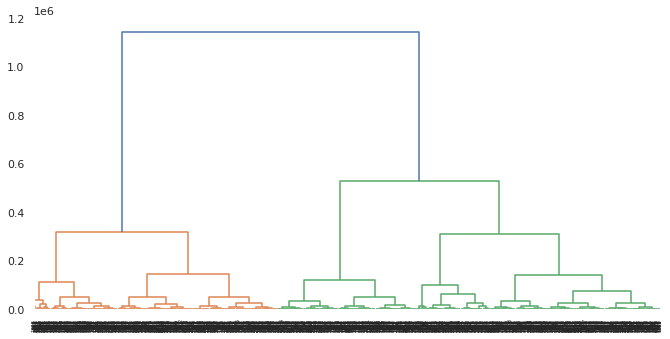

time: 34.3 s (started: 2023-03-06 12:48:55 +00:00)


In [55]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

In [56]:
clusters = 2
agc = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
y_pred = agc.fit_predict(X)
score = silhouette_score(X, y_pred)
print(f'Com {clusters} clusters a pontuação média foi {score}')

Com 2 clusters a pontuação média foi 0.5861500648710175
time: 228 ms (started: 2023-03-06 12:49:42 +00:00)


##DataVisualization

O modelo com melhor pontuação foi o KMeans com 0.6078. Este valor está mais perto de 1 do que de 0. Isso significa que, apesar de haver alguma sobreposição de clusters, não será tão difícil encontrar as diferenças entre eles. Vou criar gráficos pareando os agrupamentos para ver essas diferenças.

In [57]:
y_pred = pd.Series(data=y_pred, name='y')
dataset_ = pd.concat([X_, y_pred], axis=1)

def get_classes_hue(series):
  classes = np.vectorize(lambda x:x[0])(series.index)
  y = np.vectorize(lambda x:x[1])(series.index)
  y = ['Cluster 0' if i == 0 else 'Cluster 1' for i in y]
  return classes, y

time: 5.3 ms (started: 2023-03-06 12:55:24 +00:00)


###Visualização - Proporção dos agrupamentos.

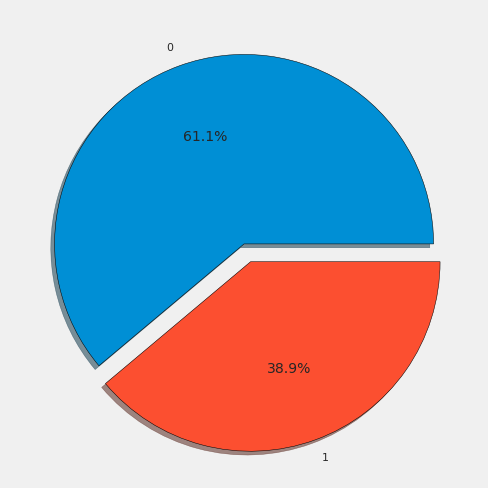

time: 287 ms (started: 2023-03-06 12:55:36 +00:00)


In [58]:
classes = dataset_['y'].value_counts(dropna=False).to_frame('amount')
slices = classes.to_numpy().ravel()
labels = classes.index.to_list()
explode = [0, 0.1] # se houver mais de duas classes, adicionar valores na lista
plt.style.use("fivethirtyeight")
plt.figure(figsize=(7, 7))
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, autopct='%1.1f%%', shadow=True)
plt.tight_layout()
plt.show()

###Visualização - Clientes

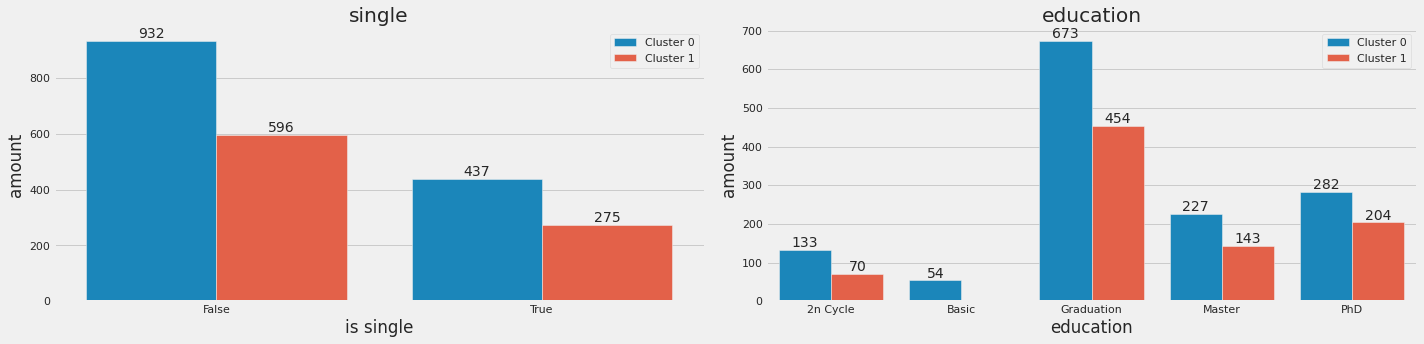

time: 777 ms (started: 2023-03-06 12:55:44 +00:00)


In [59]:
marital_education(dataset_, mstatus='single', hue=True)

**Conclusão:** As barras de cor azul são maiores em todos os casos. Isso é explicado pelo desequilíbrio de classes. A única coisa que se destaca é que no agrupamento vermelho não há ninguém com apenas ensino básico. Isso é confirmado no gráfico abaixo onde a renda de pessoas com esse nível educacional no agrupamento vermelho é 0.

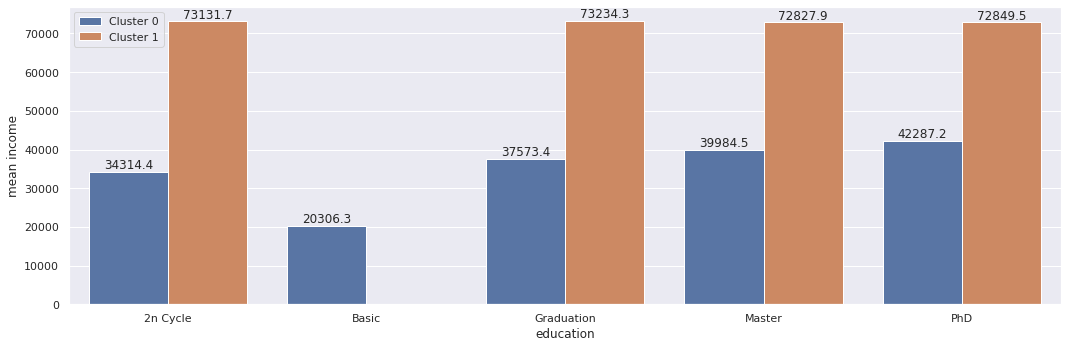

time: 647 ms (started: 2023-03-06 12:56:01 +00:00)


In [60]:
income_vs_education(dataset_, hue=True)

**Conclusão:** A renda média das pessoas do agrupamento vermelho é praticamente o dobro maior não importando o grau de escolaridade.

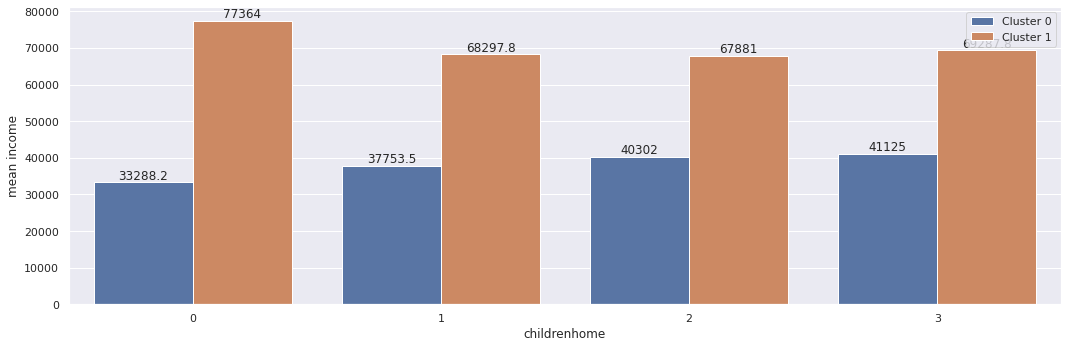

time: 425 ms (started: 2023-03-06 12:56:07 +00:00)


In [61]:
childrenhome_vs_income(dataset_, hue=True)

**Conclusão:** A renda média dos clientes que se encontram no agrupamento vermelho é bem maior do que as do zul não importando a quantidade de filhos.

###Visualização - Produtos

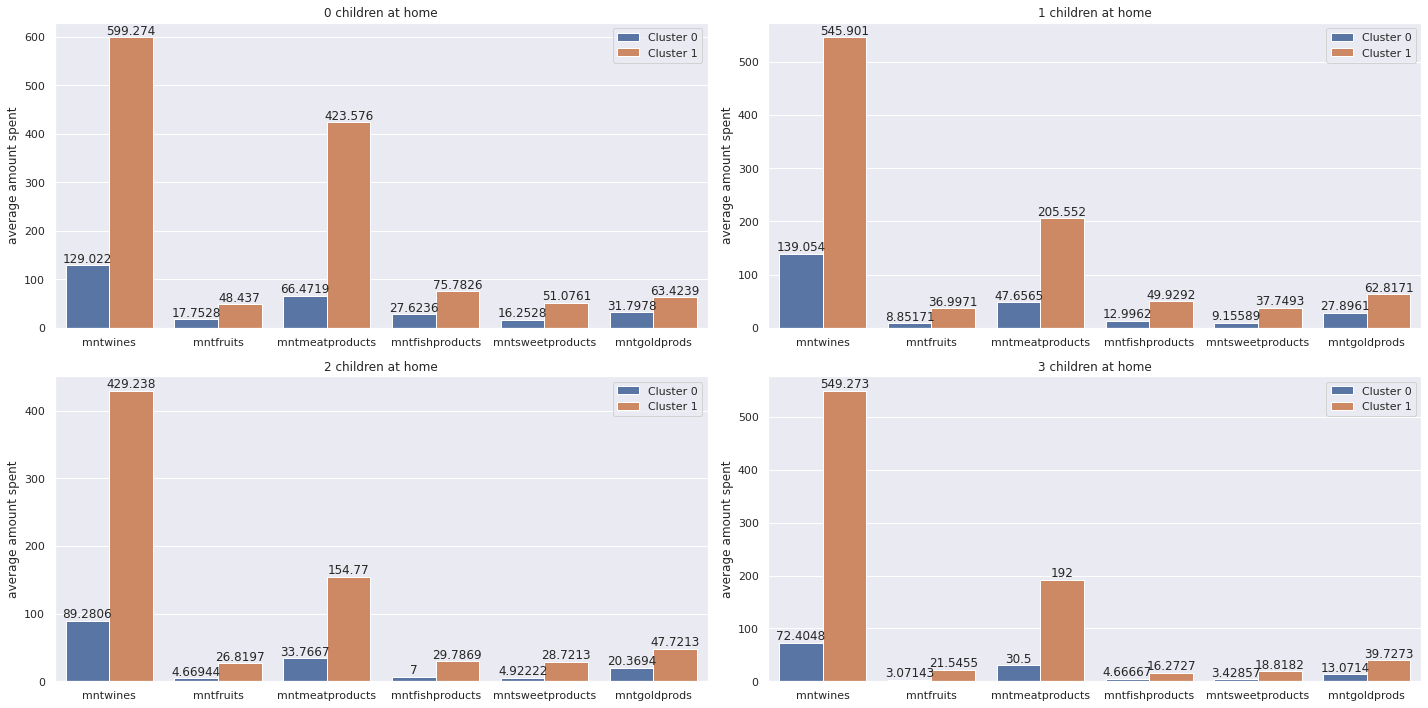

time: 2.38 s (started: 2023-03-06 12:58:04 +00:00)


In [62]:
mntproducts_vs_children(dataset_, hue=True)

**Conlcusão:** Clientes do grupo vermelho gastam mais não importando a quantidade de filhos em casa. Mas, consomem mais ainda quando não têm filhos. A ordem de consumo dos vermelhos é

Dos produtos mais consumidos para os menos consumidos
*   0 filho:  vinhos, carnes, peixes, ouro, doces e frutas
*   1 filho:  vinhos, carnes, ouro, peixes, doces e frutas
*   2 filhos: vinhos, carnes, ouro, peixes, frutas e doces
*   3 filhos: vinhos, carnes, ouro, peixes, frutas e doces

Além disso, a média de compras a medida que o número de filhos aumenta, diminui. As pessoas tendem a gastar menos quanto mais filhos têm.

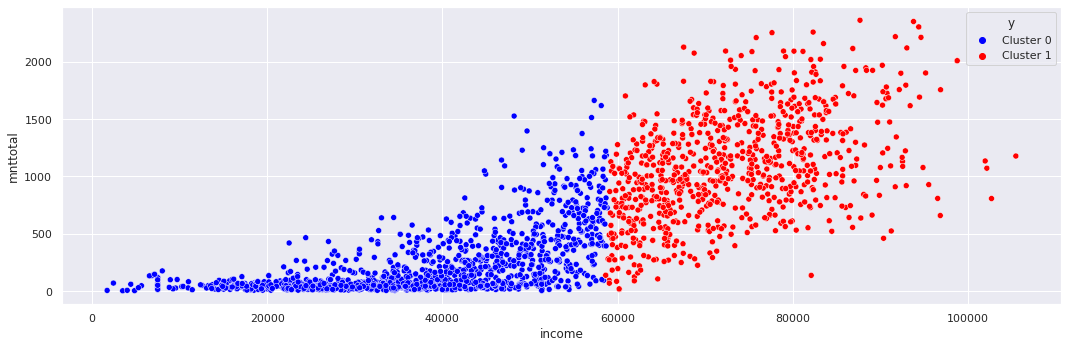

time: 564 ms (started: 2023-03-06 12:58:22 +00:00)


In [63]:
mnttotal_vs_income(dataset_, hue=True)

**Conclusão:** O gráfico acima só confirma as suspeitas do porquê clientes do grupo vermelho gastarem mais não importando o grau de escolaridade ou quantidade de filhos; a sua renda média é maior.

Se eu fizer o pareamento de grupos do gráficos abaixo vou ter bastante dificuldade para encontrar diferenças entre eles pois há muitas linhas em cada. Desse modo, decidi não fazê-lo. Minha solução foi dividir os agrupamentos em duas células diferentes.

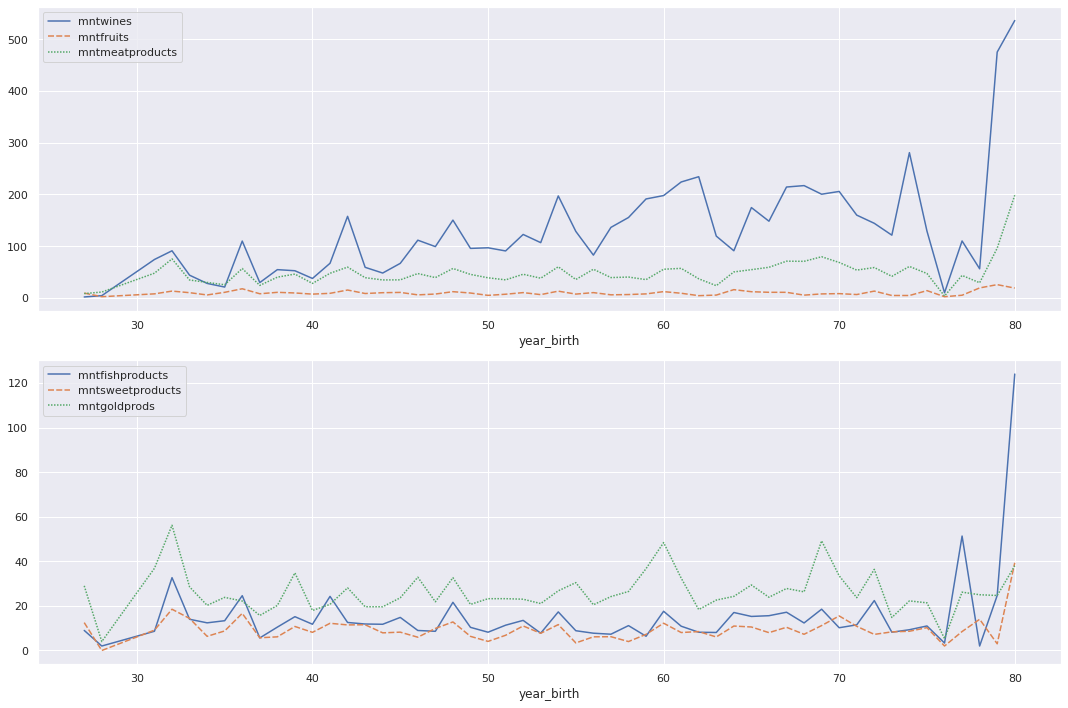

time: 925 ms (started: 2023-03-06 12:59:04 +00:00)


In [64]:
mask = dataset_['y'] == 0
cluster_0 = dataset_[mask]
mask = dataset_['y'] == 1
cluster_1 = dataset_[mask]

mntproducts_vs_age(cluster_0)

**Conclusão:** Grupo azul


*   **Vinhos:** Há um leve aumento(tendência) na compra de vinhos a medida que a idade das pessoas avança.
*   **Frutas:** Categoria menos consumida com leves picos de compras por clientes com mais ou menos 35 e 80 anos.
*   **Carnes:**  Não aumenta nem diminui conforme as pessoas ficam mais velhas, mas há picos de compras no intervalo [30, 40] e 75 anos.
*   **Peixes:** O consumo de peixes também se mantém estável com picos nos intervalos [30, 35], [75, 80] anos.
*   **Doces:** Também estável com picos de compras entre clientes na faixa etária de [30, 40].
*   **Ouro:** Idem, porém o intervalo é de [30, 35].

Isso nos mostra que nossos principais clientes estão no intervalo [30, 40] e [70, 80] anos não importanto do produto comprado.


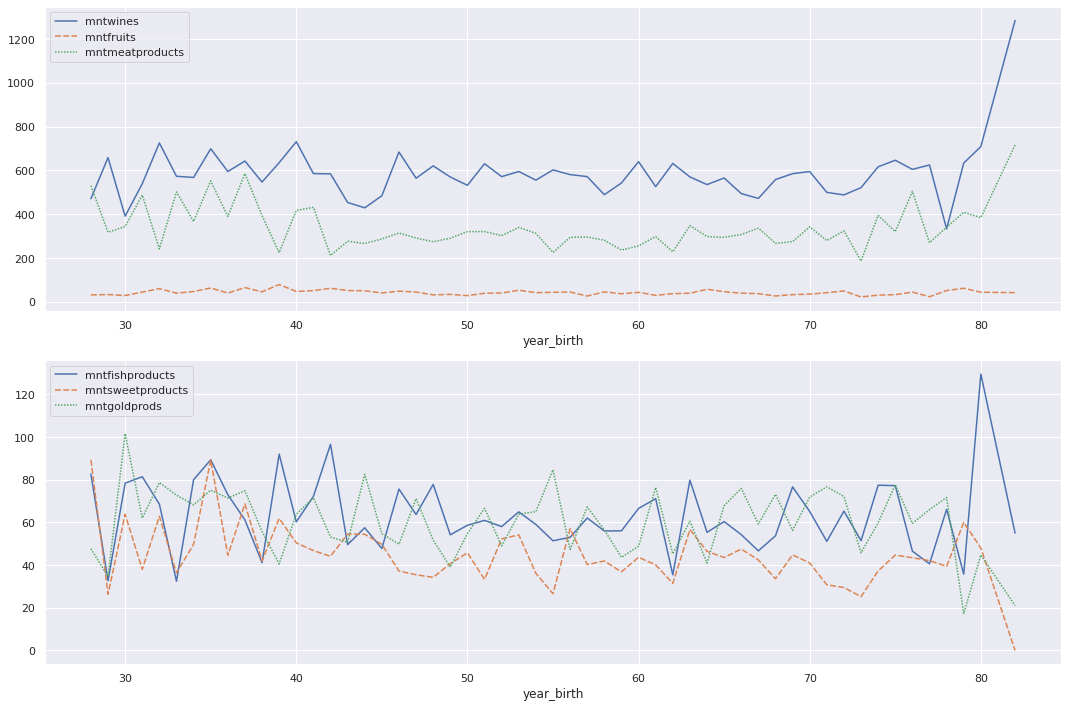

time: 955 ms (started: 2023-03-06 12:59:36 +00:00)


In [65]:
mntproducts_vs_age(cluster_1)

**Conclusão:** Grupo vermelho.


*   **Vinhos:** Não há tendência de aumento de compras conforme a idade dos clientes avança, embora hava picos no intervalo de [30, 40].
*   **Frutas:** Neste agrupamento, essa também é a categoria menos consumida com um leve aumento de compras por clientes com mais de 75 anos.
*   **Carnes:**  A faixa etária que mais consome está entre [30, 40] e a partir daí há uma leve queda de consumo só aumentando no intervalo [70, 80].
*   **Peixes:** Há um grande consumo de peixes por pessoas com mais ou menos 30 e 80 anos. No meio tempo o consumo se mantém estável.
*   **Doces:** O consumo de doces é maior no intervalo [30, 40] e depois cai levemente.
*   **Ouro:** Segue um padrão de consumo muito parecido com o de peixes.

Neste agrupamento há um claro aumento no consumo de todos os produtos já que as linhas estão numa altura maior do que no azul. Isso é explicado pelo maior poder aquisitivo destes clientes. E, mais uma vez, a faixa etária mais consumidora está entre [30, 40] e [70, 80] anos.

###Visualização - Promoções

<Figure size 504x504 with 0 Axes>

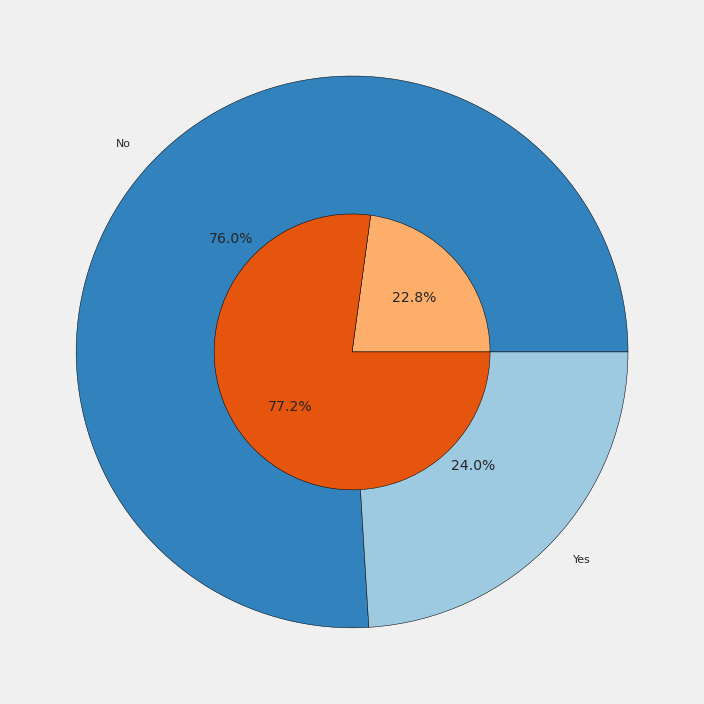

time: 503 ms (started: 2023-03-06 13:00:02 +00:00)


In [66]:
accepted_offers_rate(dataset_, clusters=True)

**Conclusão:** Além do poder aquisitivo dos clientes azuis ser menor, 76% deles não aceitam nenhuma oferta envidada. Exatamente o contrário acontece com os clientes vermelhos que, além de serem mais ricos, aceitam mais as ofertas.

###Visualização - Localizações

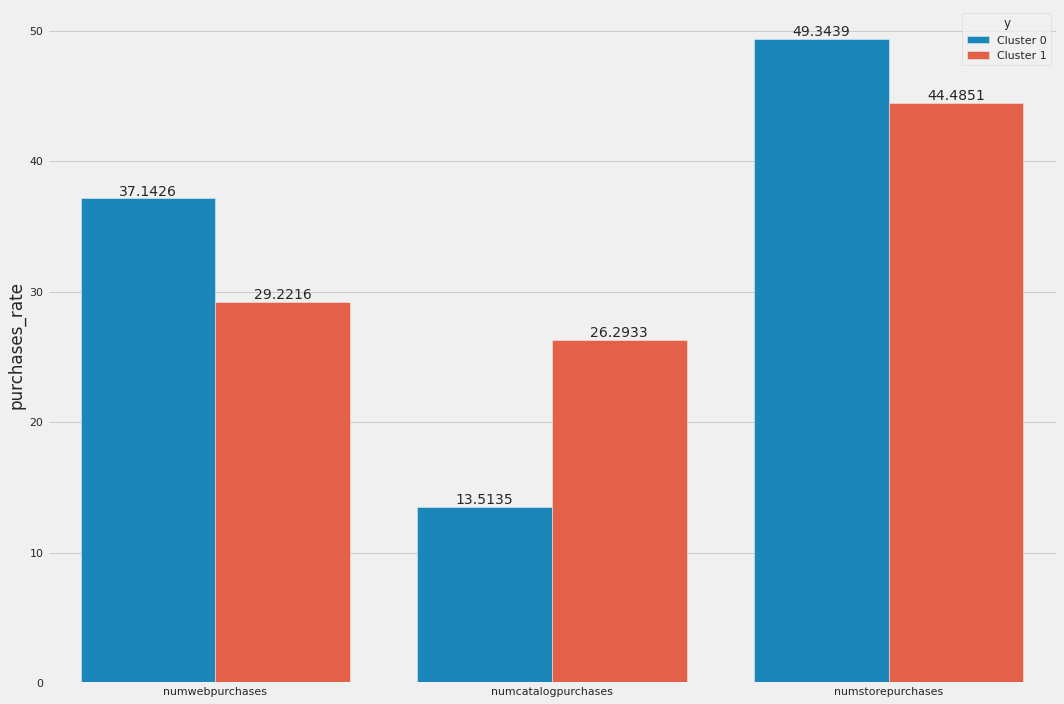

time: 384 ms (started: 2023-03-06 13:00:16 +00:00)


In [67]:
purchases_location(dataset_, hue=True)

**Conclusão:** Há uma discreta superioridade de compras feitas pela web e lojas físicas por pessoas do grupo azul. Mas, os clientes do grupo azul são o dobro quando as compras são feitas pelo catálogo da empresa.